# This file will calculate AUC and ROC of 3 methods: 

* **OHE Logistic Regression**
* **OHE Randomforest**
* **TFIDF Logistic Regestion**

### with 153165 test samples 

In [1]:
import pandas as pd
import numpy as np

# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt


label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

test_labels = pd.read_csv('test_labels.csv')
test_labels[label_cols] = test_labels[label_cols].replace(-1, 1)



 toxic : 
OHELogReg - AUC:  0.4983229403112777
OHERandomforest - AUC:  0.5003678111541748
TFIDFLogReg - AUC:  0.6384902573157102


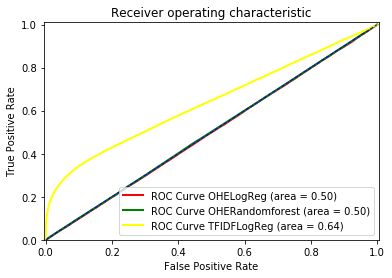


 severe_toxic : 
OHELogReg - AUC:  0.4995050709484982
OHERandomforest - AUC:  0.4993767180428098
TFIDFLogReg - AUC:  0.5671792046562812


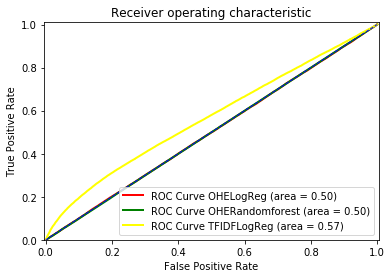


 obscene : 
OHELogReg - AUC:  0.49758876473926594
OHERandomforest - AUC:  0.49937086273486603
TFIDFLogReg - AUC:  0.6152619328273587


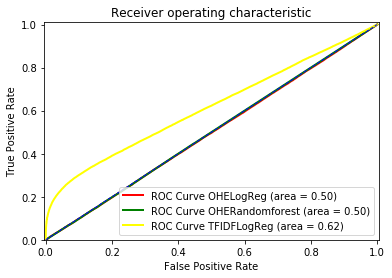


 threat : 
OHELogReg - AUC:  0.4990139969125965
OHERandomforest - AUC:  0.5005959847760356
TFIDFLogReg - AUC:  0.5483618477577954


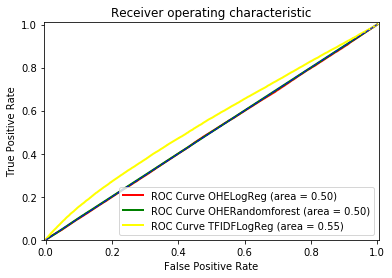


 insult : 
OHELogReg - AUC:  0.49936869390196537
OHERandomforest - AUC:  0.5010163226359075
TFIDFLogReg - AUC:  0.6084441300973569


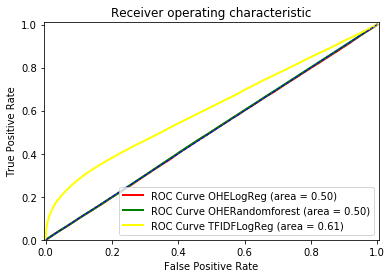


 identity_hate : 
OHELogReg - AUC:  0.4992055449788513
OHERandomforest - AUC:  0.49888295320104453
TFIDFLogReg - AUC:  0.5666844655297409


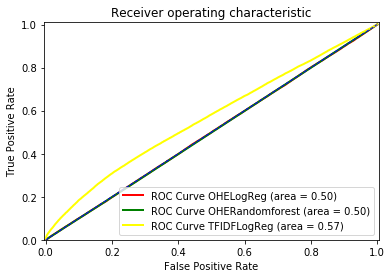

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

OHELogReg_Labels = pd.read_csv('OHE_LogReg_submission.csv')
OHERandomforest_Labels = pd.read_csv('OHE_Randomforest_submission.csv')
TFIDFLogReg_Labels = pd.read_csv('TFIDF_LogReg_submission.csv')


for col in label_cols:
    print("\n", col, ": ")
    y_test = test_labels[col]
    
    # y_prediction    
    y_pred_OHELogReg = OHELogReg_Labels[col]
    y_pred_OHERandomforest = OHERandomforest_Labels[col]
    y_pred_TFIDFLogReg = TFIDFLogReg_Labels[col]
    
    # OHELogReg AUC    
    fprOHELogReg, tprOHELogReg, thresholdsOHELogReg = metrics.roc_curve(y_test, y_pred_OHELogReg, pos_label=1)
    AUCOHELogReg = metrics.auc(fprOHELogReg, tprOHELogReg)
    print("OHELogReg - AUC: ", AUCOHELogReg)
    
    # OHERandomforest AUC
    fprOHERandomforest, tprOHERandomforest, thresholdsOHERandomforest = metrics.roc_curve(y_test, y_pred_OHERandomforest, pos_label=1)
    AUCOHERandomforest = metrics.auc(fprOHERandomforest, tprOHERandomforest)
    print("OHERandomforest - AUC: ", AUCOHERandomforest)
    
    # OHELogRegTFIDFLogRegAUC
    fprTFIDFLogReg, tprTFIDFLogReg, thresholdsTFIDFLogReg = metrics.roc_curve(y_test, y_pred_TFIDFLogReg, pos_label=1)
    AUCTFIDFLogReg = metrics.auc(fprTFIDFLogReg, tprTFIDFLogReg)
    print("TFIDFLogReg - AUC: ", AUCTFIDFLogReg)
    
    # Drawing plot for each class (label) for all 3 methods     
    %matplotlib inline
    plt.figure()
    
    plt.plot(fprOHELogReg, tprOHELogReg, color='red', lw=2, 
             label='ROC Curve OHELogReg (area = %0.2f)' % AUCOHELogReg)
    plt.plot(fprOHERandomforest, tprOHERandomforest, color='green', lw=2, 
             label='ROC Curve OHERandomforest (area = %0.2f)' % AUCOHERandomforest)
    plt.plot(fprTFIDFLogReg, tprTFIDFLogReg, color='yellow', lw=2, 
             label='ROC Curve TFIDFLogReg (area = %0.2f)' % AUCTFIDFLogReg)
    
    # Random Guess line:
    plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

    # Defining The Range of X-Axis and Y-Axis:
    plt.xlim([-0.005, 1.005])
    plt.ylim([0.0, 1.01])

    # Labels, Title, Legend:
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    plt.show()
    

